In [1]:
import pandas as pd
import numpy as np 
import re 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from scipy import stats

In [3]:
df = pd.read_excel('Open_DATA_Import Janar-Dhjetor-2024.xlsx', sheet_name='IMPORT_1')


In [4]:
print(df)  

        VITI  MUAJI Regjimi        Origjina  \
0       2024      1     IM4       CN - KINA   
1       2024      1     IM4    PL - POLONIA   
2       2024      1     IM4       CN - KINA   
3       2024      1     IM4  BG - BULLGARIA   
4       2024      1     IM4  DE - GJERMANIA   
...      ...    ...     ...             ...   
233633  2024     12     IM4  DE - GJERMANIA   
233634  2024     12     IM4      IN - INDIA   
233635  2024     12     IM4     IT - ITALIA   
233636  2024     12     IM4       CN - KINA   
233637  2024     12     IM4    PL - POLONIA   

                                             Kodi Tarifor  Sasia  \
0       8807100090 - Helikat dhe rotorët dhe pjesët e ...    NaN   
1       8529101190 - Antenat teleskopike dhe të tipit ...    NaN   
2       8806229090 - Me peshën maksimale të ngritjes m...    NaN   
3       8413703090 - Pompat forcuese glandless për sis...   20.0   
4       9405618090 - Shenjat e ndriçimit, tabelat e nd...    NaN   
...                        

In [5]:
from tabulate import tabulate
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))

+---+------+-------+---------+----------------+--------------------------------------------------------------------------------------------------------------------------------+-------+----------------+-----------+---------------+---------------+---------------+
|   | VITI | MUAJI | Regjimi |    Origjina    |                                                          Kodi Tarifor                                                          | Sasia | Vlera Mallrave | Netweight | Taksa Doganës | Taksa Akcizës | Taksa TVSH-së |
+---+------+-------+---------+----------------+--------------------------------------------------------------------------------------------------------------------------------+-------+----------------+-----------+---------------+---------------+---------------+
| 0 | 2024 |   1   |   IM4   |   CN - KINA    |                                       8807100090 - Helikat dhe rotorët dhe pjesët e tyre                                       |  nan  |     786.21     |    1.0    | 

In [6]:
df.describe()

,VITI,MUAJI,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së
count,233638.0,233638.000000,7.294300e+04,2.336380e+05,2.336380e+05,2.336380e+05,2.336380e+05,2.336380e+05
mean,2024.0,6.634961,2.797952e+04,2.708681e+04,2.332468e+04,7.196629e+02,2.621695e+03,4.395679e+03
std,0.0,3.438751,6.357634e+05,2.529220e+05,4.405324e+05,9.445219e+03,1.291118e+05,6.060343e+04
min,2024.0,1.000000,1.000000e-02,0.000000e+00,5.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2024.0,4.000000,4.065000e+00,2.425000e+02,1.000000e+01,0.000000e+00,0.000000e+00,2.798000e+01
50%,2024.0,7.000000,4.100000e+01,1.564370e+03,1.320000e+02,5.890000e+00,0.000000e+00,2.019600e+02
75%,2024.0,10.000000,5.939200e+02,9.675280e+03,1.782898e+03,9.960750e+01,0.000000e+00,1.306477e+03
max,2024.0,12.000000,6.315474e+07,3.772116e+07,5.145773e+07,1.015553e+06,2.256510e+07,1.084940e+07


In [7]:
df.tail()

,VITI,MUAJI,Regjimi,Origjina,Kodi Tarifor,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së
233633,2024,12,IM4,DE - GJERMANIA,9002900090 - Të tjera,NaN,20.00,1.000,2.00,0.0,3.96
233634,2024,12,IM4,IN - INDIA,9004109100 - Syze dielli me lente plastike,1.0,67.00,0.300,6.70,0.0,13.27
233635,2024,12,IM4,IT - ITALIA,"9004109900 - Syze dielli me lente jo plastike,...",290.0,16829.22,51.720,182.37,0.0,3062.09
233636,2024,12,IM4,CN - KINA,8529909100 - Dritat emituese me Dioda (LED) mo...,NaN,655.55,8.395,65.56,0.0,129.80
233637,2024,12,IM4,PL - POLONIA,8529909290 - Të tjera,NaN,577.26,12.000,57.73,0.0,114.30


In [8]:
data_info = df.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233638 entries, 0 to 233637
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   VITI            233638 non-null  int64  
 1   MUAJI           233638 non-null  int64  
 2   Regjimi         233638 non-null  object 
 3   Origjina        233638 non-null  object 
 4   Kodi Tarifor    233638 non-null  object 
 5   Sasia           72943 non-null   float64
 6   Vlera Mallrave  233638 non-null  float64
 7   Netweight       233638 non-null  float64
 8   Taksa Doganës   233638 non-null  float64
 9   Taksa Akcizës   233638 non-null  float64
 10  Taksa TVSH-së   233638 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 19.6+ MB
None


In [9]:
df.shape

(233638, 11)

In [10]:
print(df.describe().T)

                   count          mean            std       min       25%  \
VITI            233638.0   2024.000000       0.000000  2024.000  2024.000   
MUAJI           233638.0      6.634961       3.438751     1.000     4.000   
Sasia            72943.0  27979.524529  635763.398873     0.010     4.065   
Vlera Mallrave  233638.0  27086.812414  252921.972771     0.000   242.500   
Netweight       233638.0  23324.680984  440532.397847     0.005    10.000   
Taksa Doganës   233638.0    719.662944    9445.218869     0.000     0.000   
Taksa Akcizës   233638.0   2621.695037  129111.766048     0.000     0.000   
Taksa TVSH-së   233638.0   4395.678829   60603.433861     0.000    27.980   

                    50%         75%          max  
VITI            2024.00  2024.00000      2024.00  
MUAJI              7.00    10.00000        12.00  
Sasia             41.00   593.92000  63154738.50  
Vlera Mallrave  1564.37  9675.28029  37721159.11  
Netweight        132.00  1782.89750  51457733.00  


In [11]:
df.describe(include=['O'])


,Regjimi,Origjina,Kodi Tarifor
count,233638,233638,233638
unique,1,194,6699
top,IM4,CN - KINA,3926909790 - Artikuj te tjere prej plastike
freq,233638,27784,595


In [12]:
duplicated=df.duplicated().sum()
print((duplicated/len(df))*100 , '%')

0.0 %


<Axes: >

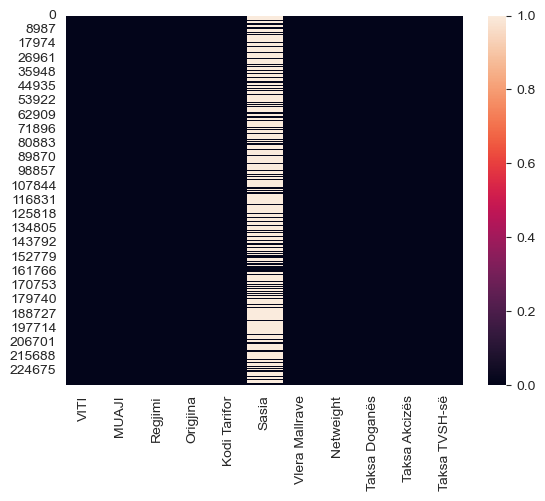

In [13]:
sns.heatmap(df.isnull())


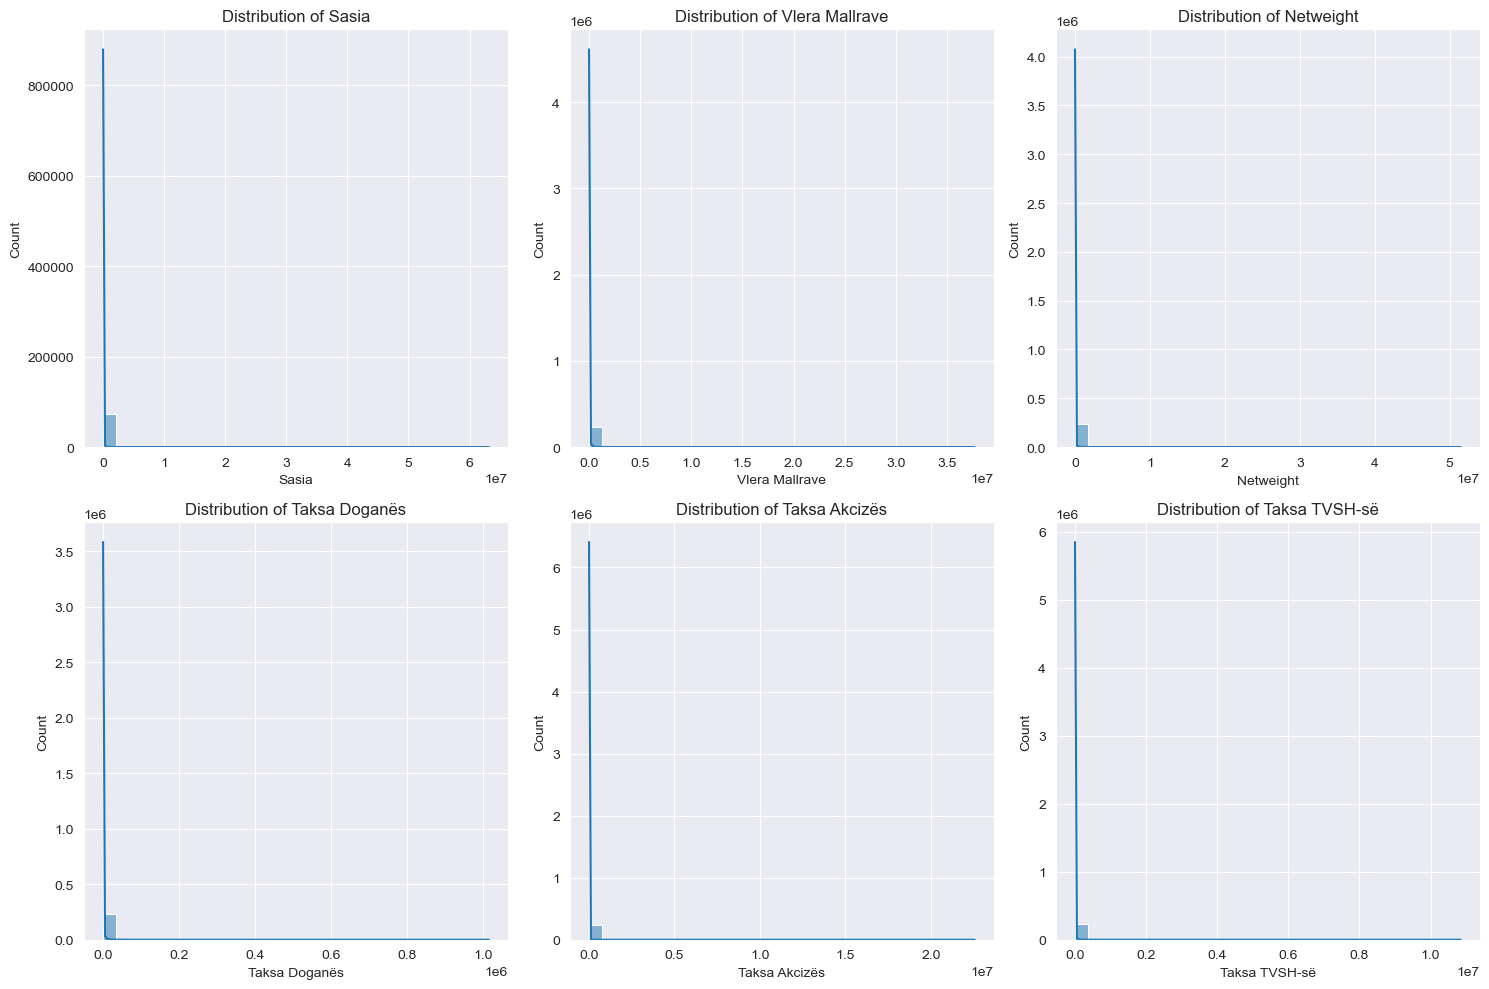

In [14]:
numeric_cols = ['Sasia', 'Vlera Mallrave', 'Netweight', 'Taksa Doganës', 'Taksa Akcizës', 'Taksa TVSH-së']
df[numeric_cols] = df[numeric_cols].replace({',': ''}, regex=True).astype(float)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

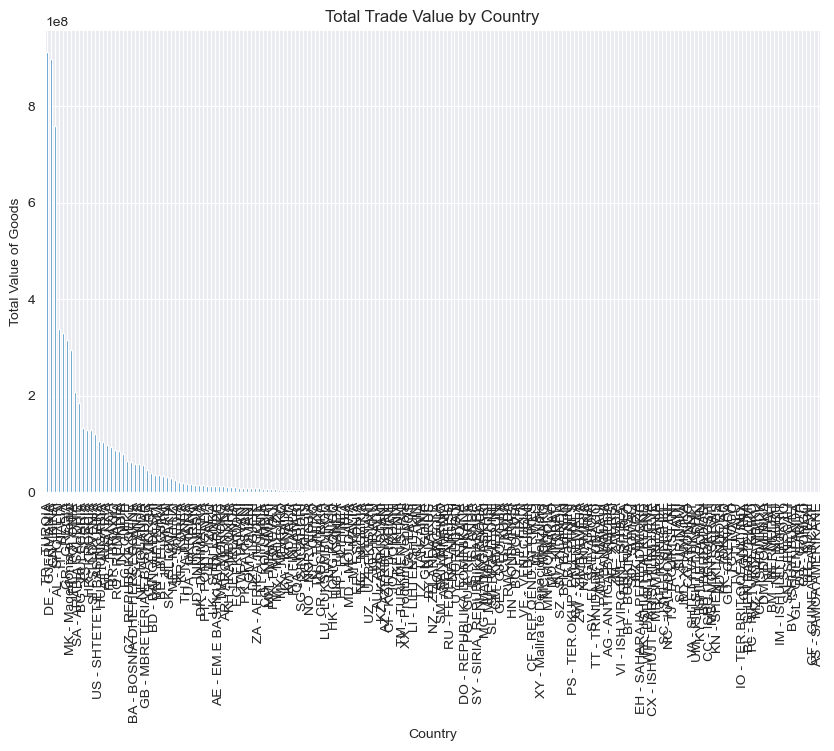

In [15]:

plt.figure(figsize=(10, 6))
df.groupby('Origjina')['Vlera Mallrave'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Trade Value by Country')
plt.xlabel('Country')
plt.ylabel('Total Value of Goods')
plt.show()

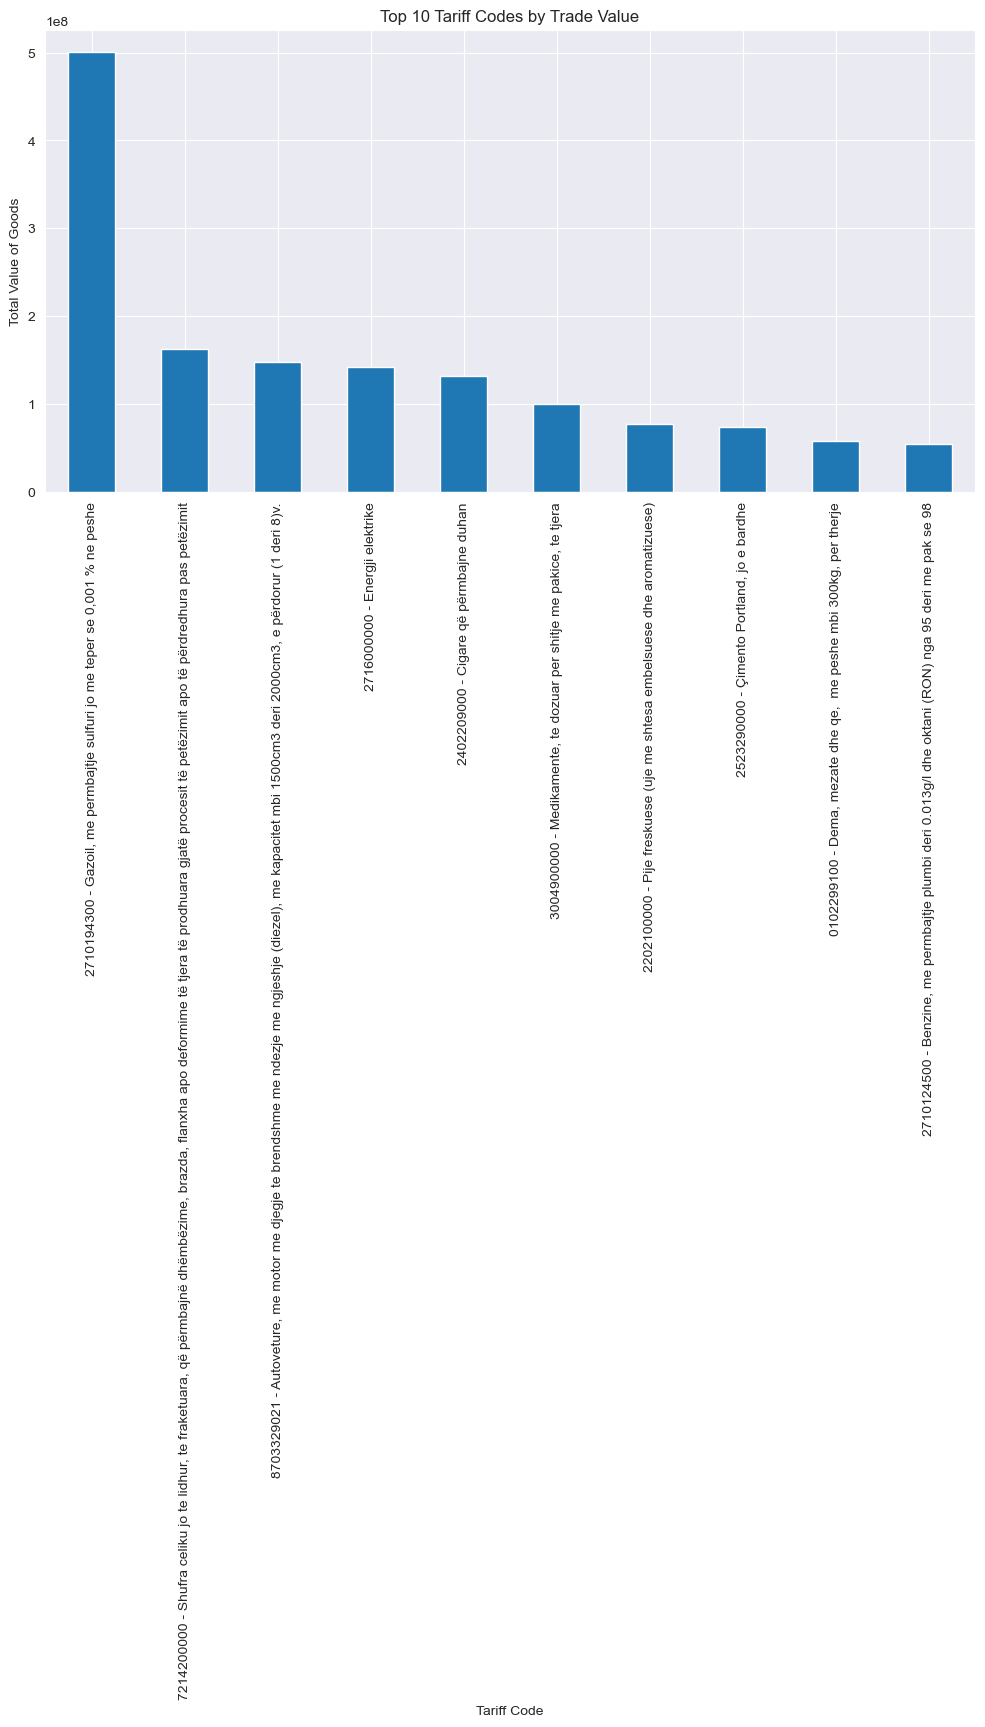

In [16]:
plt.figure(figsize=(12, 6))
df.groupby('Kodi Tarifor')['Vlera Mallrave'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Tariff Codes by Trade Value')
plt.xlabel('Tariff Code')
plt.ylabel('Total Value of Goods')
plt.show()

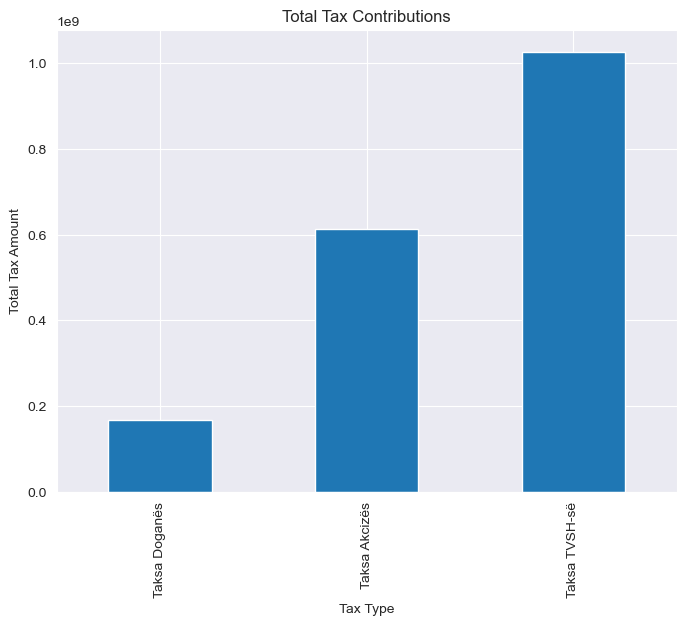

In [17]:
tax_columns = ['Taksa Doganës', 'Taksa Akcizës', 'Taksa TVSH-së']
total_taxes = df[tax_columns].sum()
plt.figure(figsize=(8, 6))
total_taxes.plot(kind='bar', stacked=True)
plt.title('Total Tax Contributions')
plt.xlabel('Tax Type')
plt.ylabel('Total Tax Amount')
plt.show()

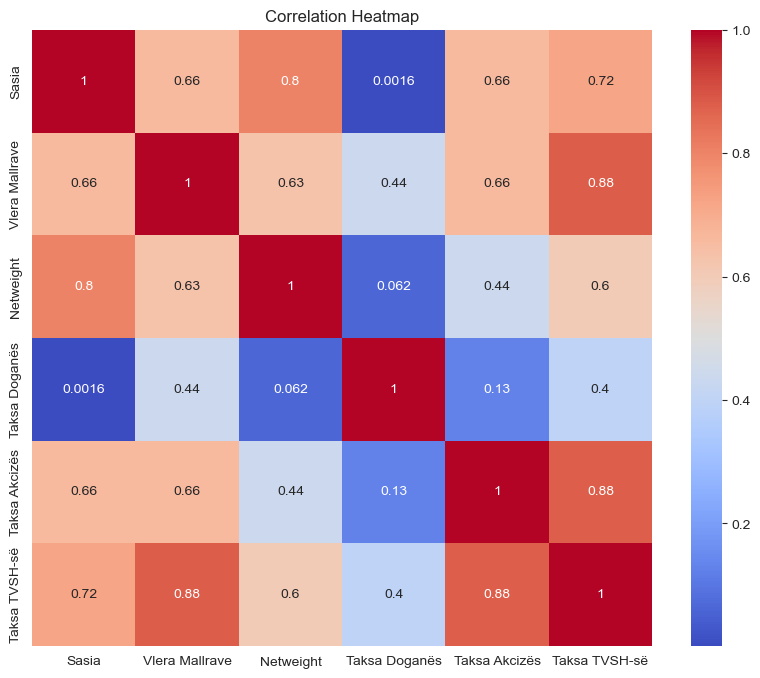

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
distinct_origjina = df['Origjina'].unique()

print("Distinct values in 'Origjina':")
for index, value in enumerate(distinct_origjina, 1):
    print(f"{index}. {value}")

Distinct values in 'Origjina':
1. CN - KINA
2. PL - POLONIA
3. BG - BULLGARIA
4. DE - GJERMANIA
5. TR - TURQIA
6. GR - GREQIA
7. JP - JAPANI
8. CZ - REPUBLIKA QEKE
9. CA - KANADA
10. AT - AUSTRIA
11. BA - BOSNIA DHE HERCEGOVINA
12. MK - Maqedonia e Veriut
13. EC - EKUADORI
14. NL - HOLANDA
15. ES - SPANJA
16. GH - GANA
17. AL - SHQIPËRI
18. SK - SLLOVAKIA
19. KE - KENIA
20. PT - PORTUGALIA
21. SI - SLLOVENIA
22. BR - BRAZILI
23. US - SHTETET E BASHKUARA
24. GB - MBRETËRIA E BASHKUAR
25. IT - ITALIA
26. RO - RUMANIA
27. VN - VIETNAMI
28. UA - UKRAINA
29. CL - KILI
30. MA - MOROKO
31. EG - EGJIPTI
32. HR - KROACIA
33. HU - HUNGARIA
34. PE - PERUJA
35. FR - FRANCA
36. ME - MALI I ZI
37. LY - LIBIA
38. BF - BURKINA FASO
39. IN - INDIA
40. BE - BELGJIKA
41. IE - IRLANDA
42. XS - SËRBIA
43. TH - TAJLANDA
44. CH - ZVICRRA
45. KR - KOREA
46. LT - LITUANIA
47. EE - ESTONIA
48. DZ - ALGJERI
49. ID - INDONESIA
50. PK - PAKISTANI
51. DK - DANIMARKA
52. SE - SUEDIA
53. IL - IZAELI
54. HK - HONG KON

In [20]:
distinct_origjina = df['Regjimi'].unique()

print("Distinct values in 'Regjimi':")
for index, value in enumerate(distinct_origjina, 1):
    print(f"{index}. {value}")

Distinct values in 'Regjimi':
1. IM4


In [21]:
distinct_origjina = df['Kodi Tarifor'].unique()

print("Distinct values in 'Kodi Tarifor':")
for index, value in enumerate(distinct_origjina, 1):
    print(f"{index}. {value}")

Distinct values in 'Kodi Tarifor':
1. 8807100090 - Helikat dhe rotorët dhe pjesët e tyre
2. 8529101190 - Antenat teleskopike dhe të tipit kamzhik për aparatet portative apo për aparatet për t?u përshtatur në automjetet
3. 8806229090 - Me peshën maksimale të ngritjes më shumë se 250 g, por jo më shumë se 7 kg:
4. 8413703090 - Pompat forcuese glandless për sistemet ngrohëse dhe pajisjet me ujë të ngrohtë
5. 9405618090 - Shenjat e ndriçimit, tabelat e ndriçuara të emrave dhe të ngjashme:
6. 9405612090 - Shenjat e ndriçimit, tabelat e ndriçuara të emrave dhe të ngjashme:
7. 9405194090 - Te tjera
8. 9405114090 - Projektuar për përdorim vetëm me burime drite me diodë që lëshon dritë (LED):
9. 8504408390 - Te tjera
10. 8504408590 - Te Tjera
11. 8504408690 - Te Tjera
12. 8504406090 - Te Tjera
13. 2530907000 - Te tjera
14. 7019629000 - Pëlhura të tjera të mbyllura të rovings
15. 0403901300 - Dhalle, pa aroma, fruta, arra, kakao apo embelsime shtese, ne forma solide, me yndyre mbi 1.5% deri 27% 

In [22]:
missing_values = df.isnull().sum()
missing_values

VITI                   0
MUAJI                  0
Regjimi                0
Origjina               0
Kodi Tarifor           0
Sasia             160695
Vlera Mallrave         0
Netweight              0
Taksa Doganës          0
Taksa Akcizës          0
Taksa TVSH-së          0
dtype: int64

In [24]:
total_dataset = np.prod(df.shape)
total_missing = missing_values.sum()
percent = (total_missing / total_dataset) * 100
percent

np.float64(6.252679942319469)

In [25]:
# Calculate and display missing values and their percentage, sorted by percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data_sorted = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=True)

print("\nMissing values in the dataset:\n", missing_data_sorted)


Missing values in the dataset:
        Missing Values  Percentage
Sasia          160695   68.779479


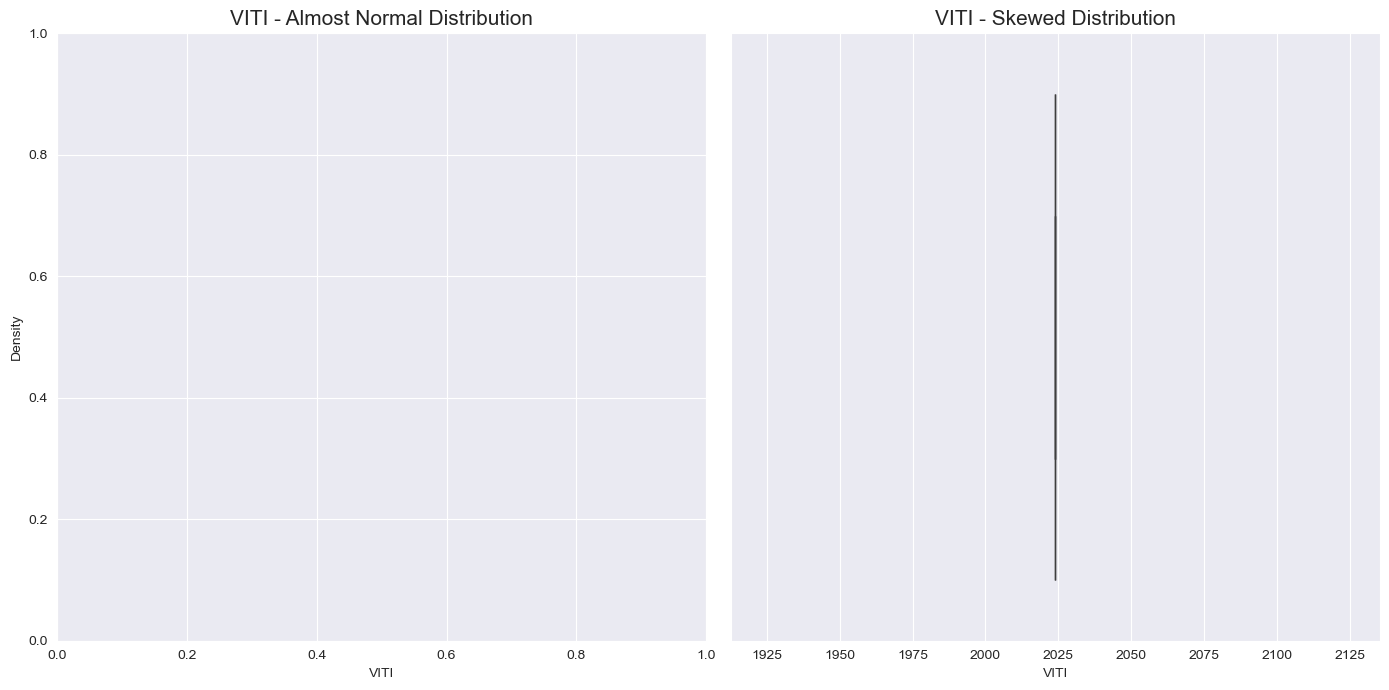

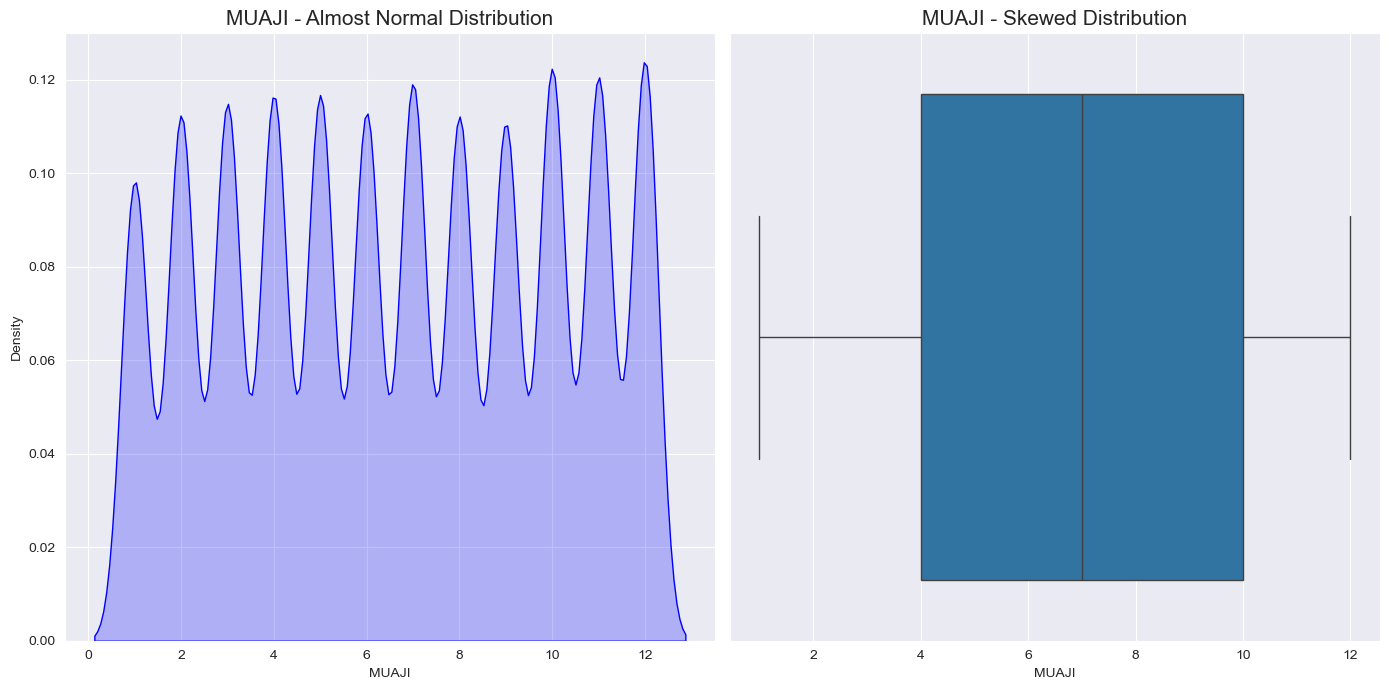

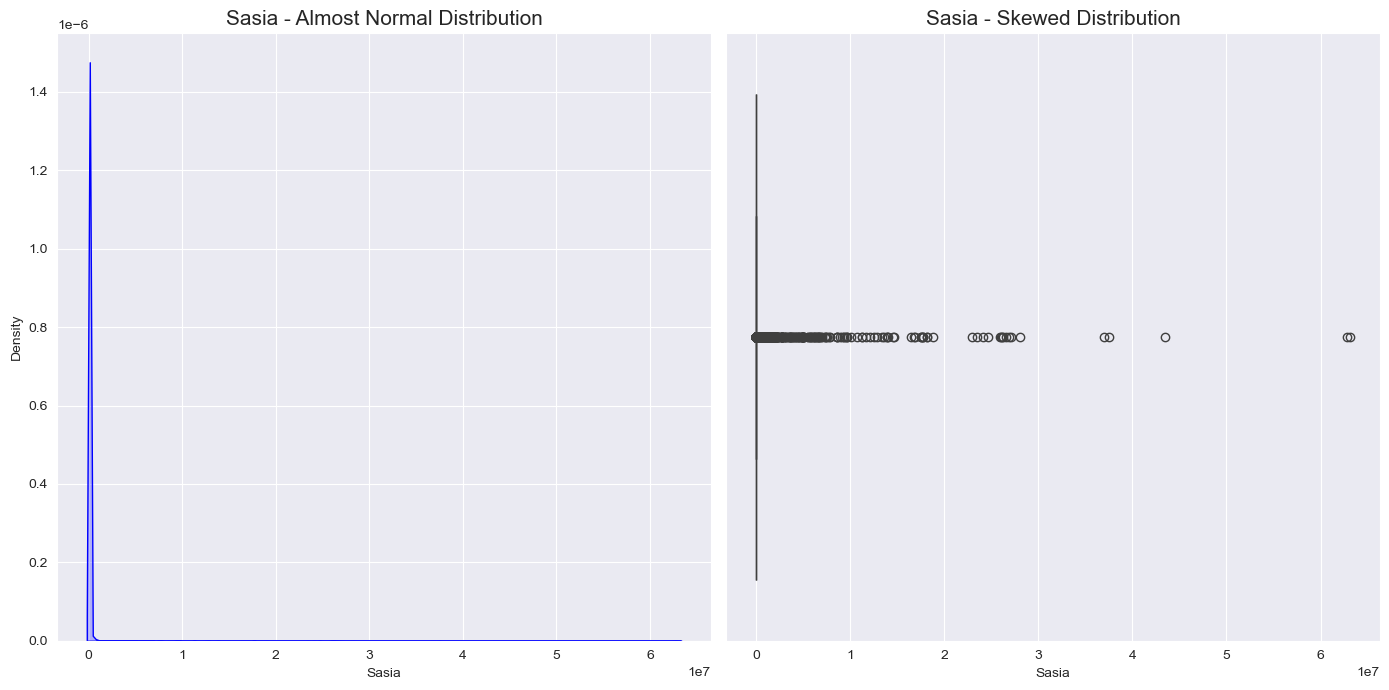

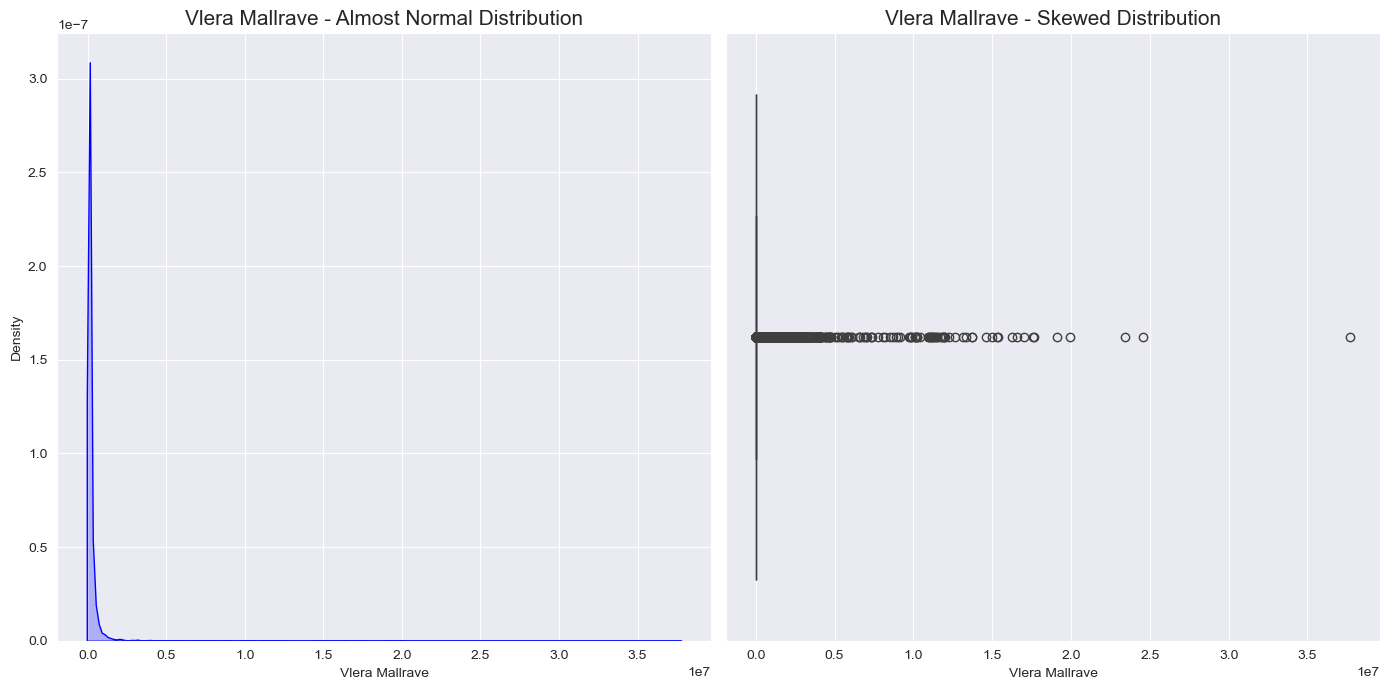

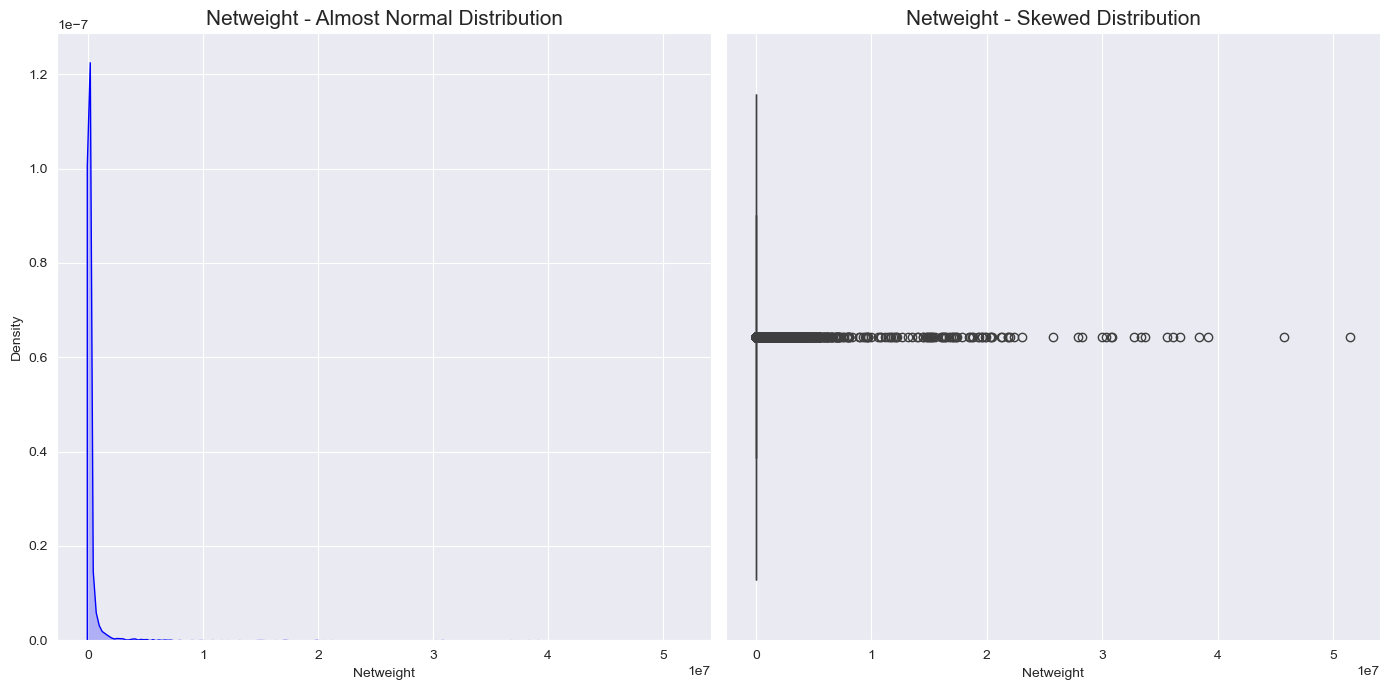

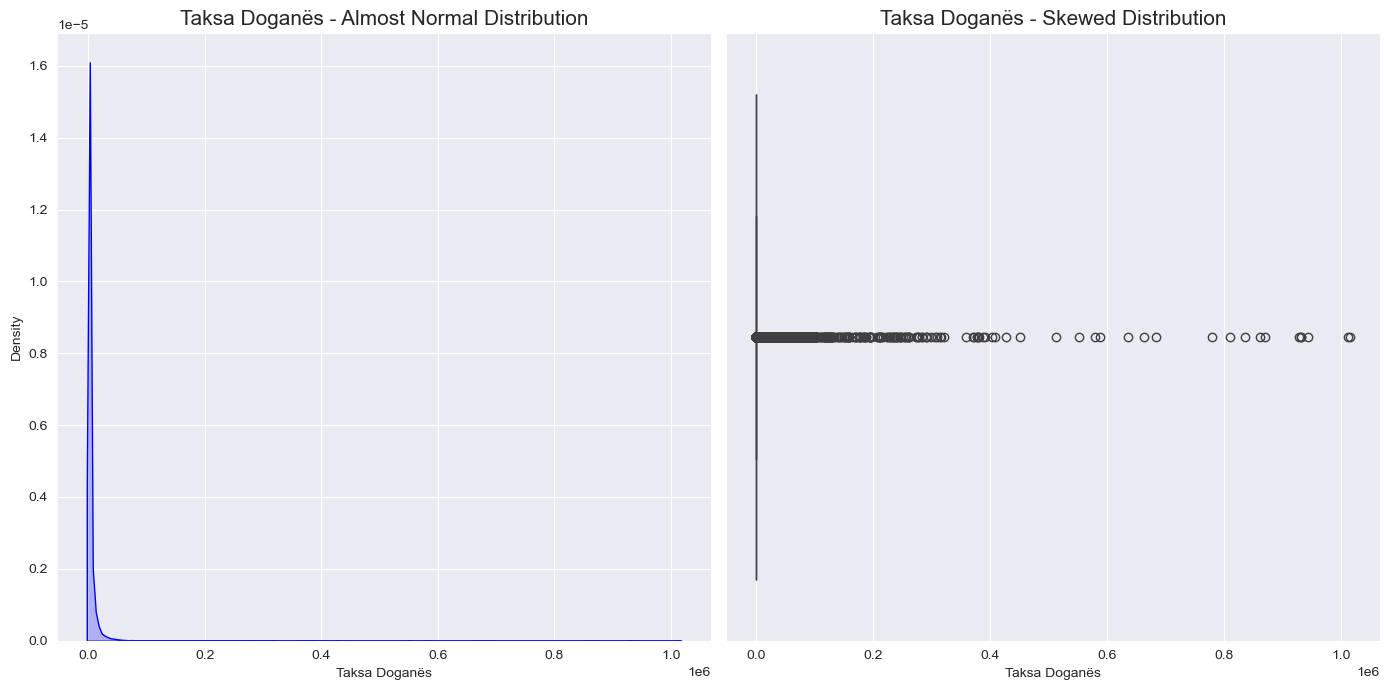

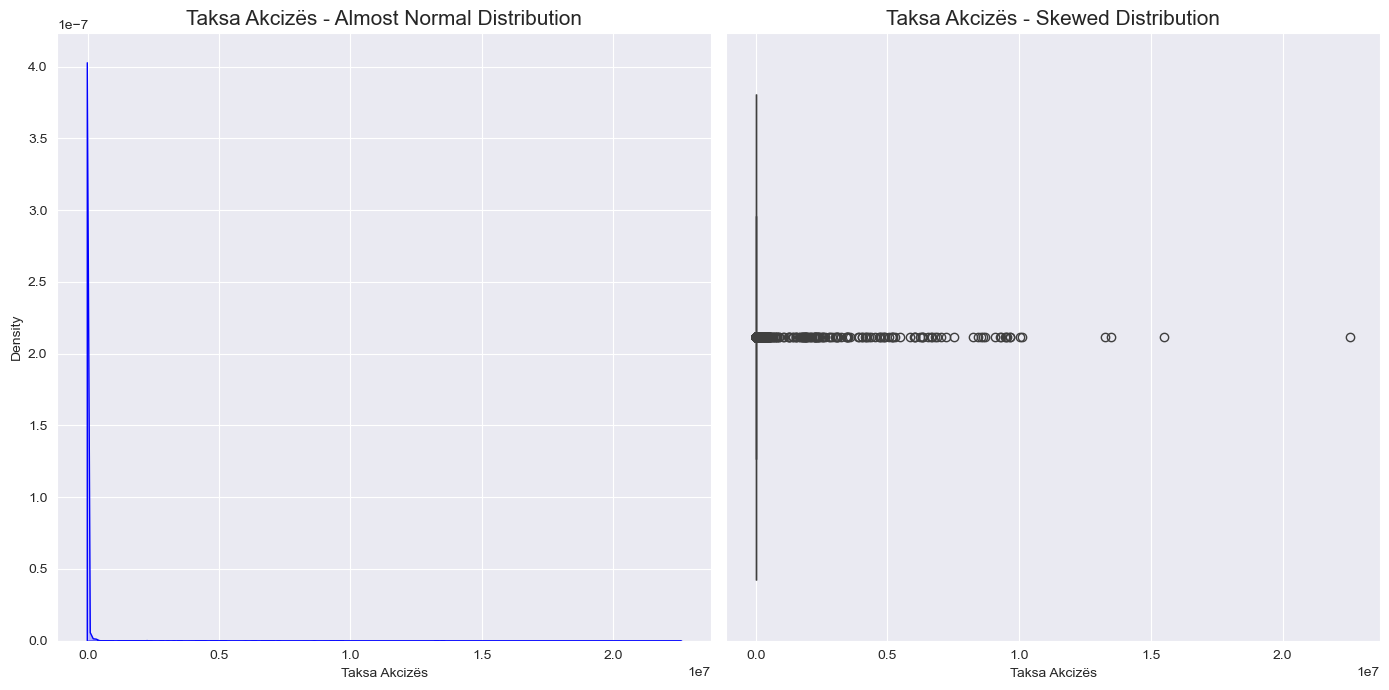

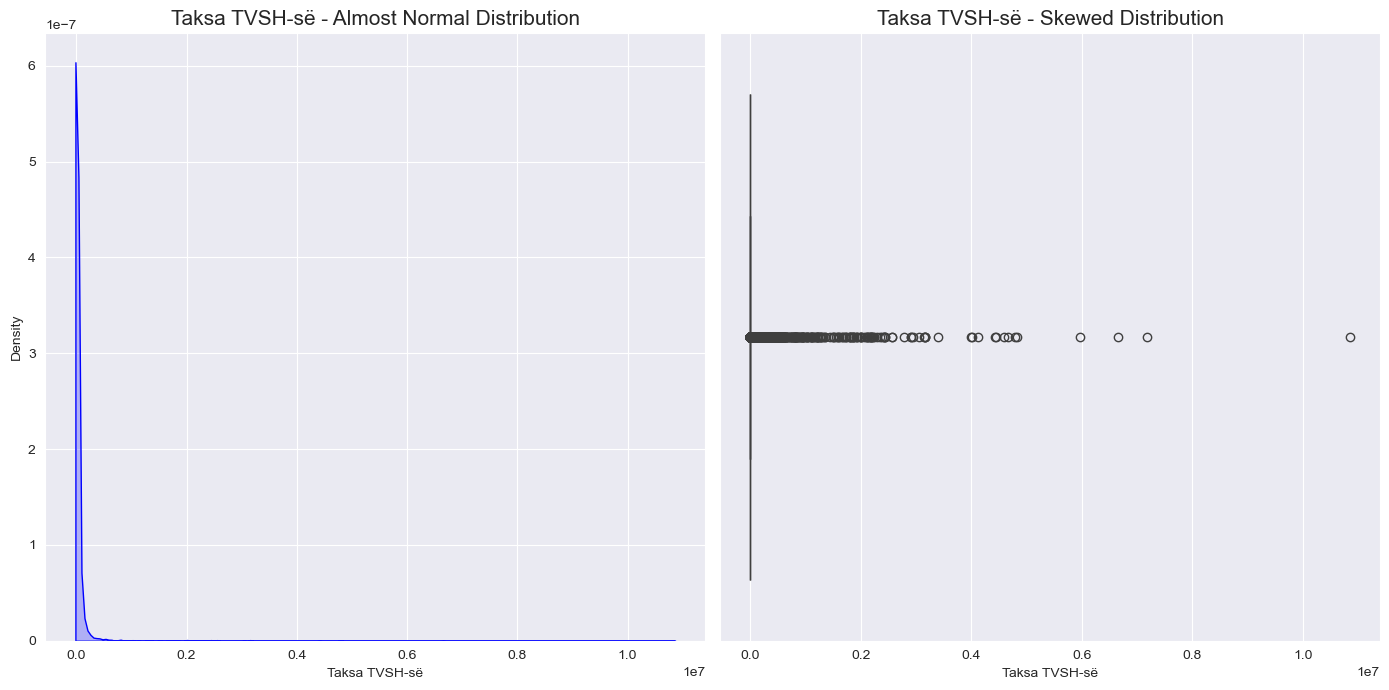

In [26]:
# taking the numerical columns
numeric_columns1 = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns1:
    plt.figure(figsize=(14, 7))
    
    # Subplot 1: Kernel Density Estimation Plot
    plt.subplot(1, 2, 1)
    plt.title(f"{column} - Almost Normal Distribution", fontsize=15)
    sns.kdeplot(data=df[column], fill=True, color="blue", warn_singular=False)
    
    # Subplot 2: Box Plot
    plt.subplot(1, 2, 2)
    plt.title(f"{column} - Skewed Distribution", fontsize=15)
    sns.boxplot(data=df[column], orient="h")
    
    plt.tight_layout()
    plt.show()

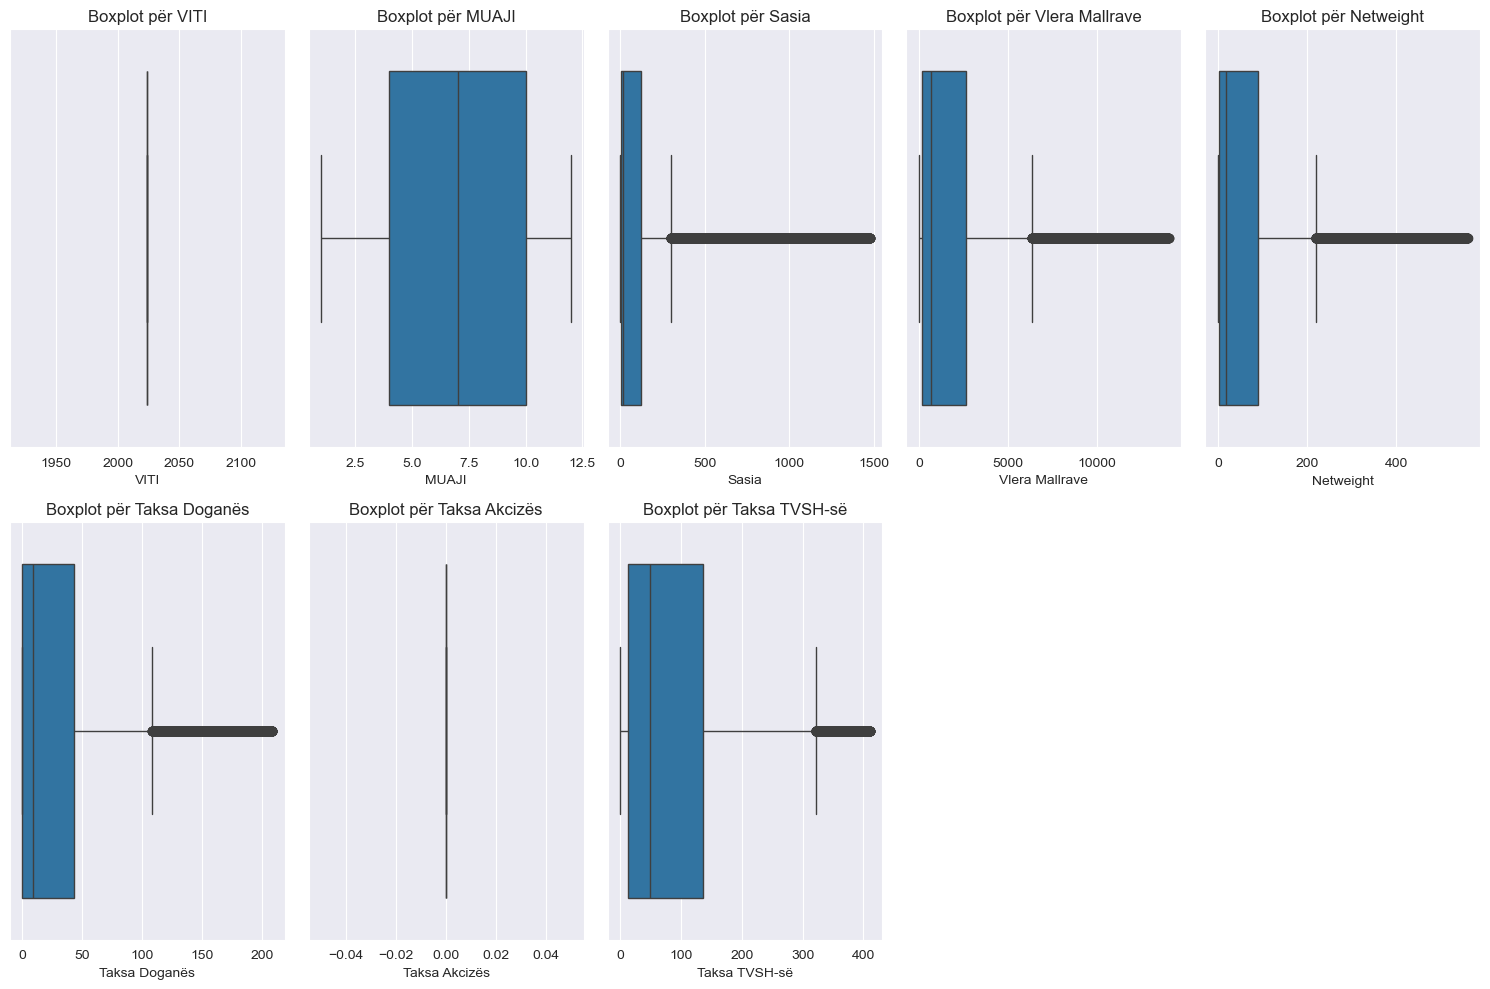

In [27]:
def detect_outliers_with_plot(df):
   
   #taking the numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    #making a copy of the dataset
    df_cleaned = df.copy()
    
    plt.figure(figsize=(15, 10))
    
    for i, col in enumerate(numeric_columns, 1):
        # Calculate Quartiles and IQR
        
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        # Determine outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
        
        # for each column a boxplot is created using Seaborn's boxplot function to visualize the distribution of the cleaned data (after outliers are removed)
        plt.subplot(2, len(numeric_columns) // 2 + 1, i)
        sns.boxplot(x=df_cleaned[col])
        plt.title(f'Boxplot për {col}')
    
    plt.tight_layout()
    plt.show()
    
    return df_cleaned

df_cleaned = detect_outliers_with_plot(df)

In [28]:
# Calculation of the first and third quartiles
Q1 = df['Sasia'].quantile(0.25)  # 25% percentile (Q1)
Q3 = df['Sasia'].quantile(0.75)  # 75% percentile (Q3)
IQR = Q3 - Q1  # Interquartile Range (IQR), which is the difference between Q3 and Q1

# Detecting outliers
outliersSasia = df[(df['Sasia'] < (Q1 - 1.5 * IQR)) | (df['Sasia'] > (Q3 + 1.5 * IQR))]
# Filter rows where Sasia is less than the lower bound or greater than the upper bound of the IQR

print("Numri i zbulimeve jo të sakta:", len(outliersSasia))  

Numri i zbulimeve jo të sakta: 13269


In [29]:
# Correlation between numerical columns
df_cleaned.corr(numeric_only=True)

,VITI,MUAJI,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së
VITI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MUAJI,NaN,1.000000,-0.002013,-0.004015,0.003426,-0.004123,NaN,-0.000619
Sasia,NaN,-0.002013,1.000000,0.192927,0.185950,0.208175,NaN,0.258740
Vlera Mallrave,NaN,-0.004015,0.192927,1.000000,0.284548,0.427298,NaN,0.652536
Netweight,NaN,0.003426,0.185950,0.284548,1.000000,0.152606,NaN,0.257741
Taksa Doganës,NaN,-0.004123,0.208175,0.427298,0.152606,1.000000,NaN,0.757185
Taksa Akcizës,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taksa TVSH-së,NaN,-0.000619,0.258740,0.652536,0.257741,0.757185,NaN,1.000000


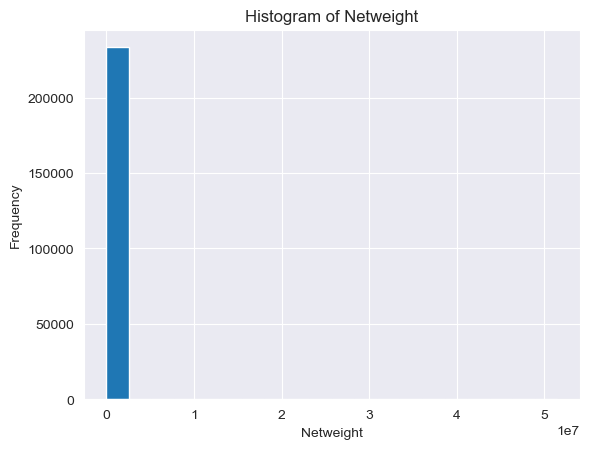

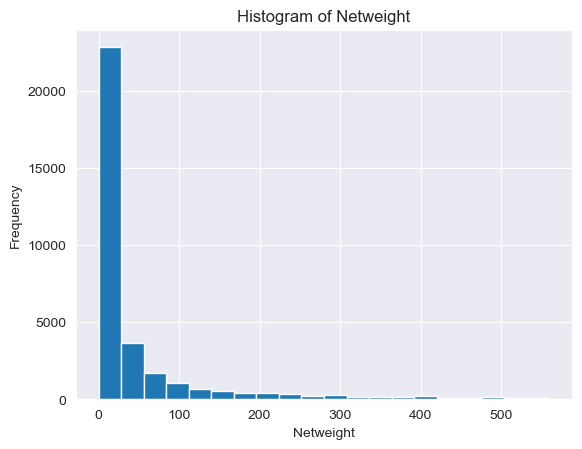

In [30]:
# Histogram for data distribution before cleaning
df['Netweight'].hist(bins=20)  # Creating a histogram for 'Netweight' before cleaning with 20 bins
plt.title('Histogram of Netweight')  
plt.xlabel('Netweight') 
plt.ylabel('Frequency') 
plt.show() 

# Histogram for data distribution after cleaning
df_cleaned['Netweight'].hist(bins=20)  # Creating a histogram for 'Netweight' after cleaning with 20 bins
plt.title('Histogram of Netweight')  
plt.xlabel('Netweight') 
plt.ylabel('Frequency') 
plt.show() 

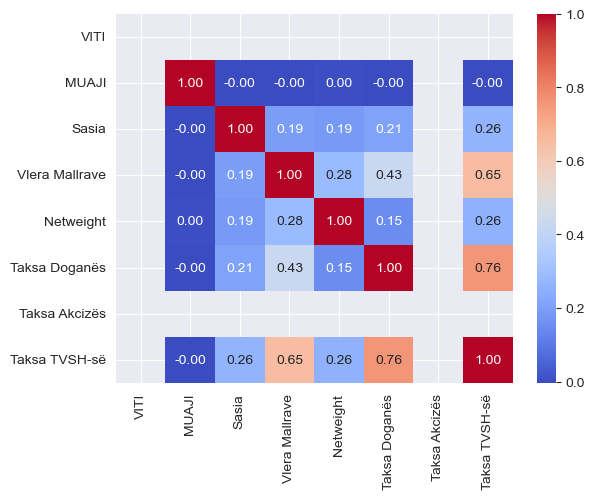

In [31]:
# Heatmap for correlation between numeric columns
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [32]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])  # keep only numerical columns
    # Remove columns that would lead to df being singular
    df = df.dropna(axis=1)  # drop columns with any missing values
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns with more than 1 unique value
    columnNames = list(df)
    if len(columnNames) > 10:  # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    
    plt.suptitle('Scatter and Density Plot')
    plt.show()

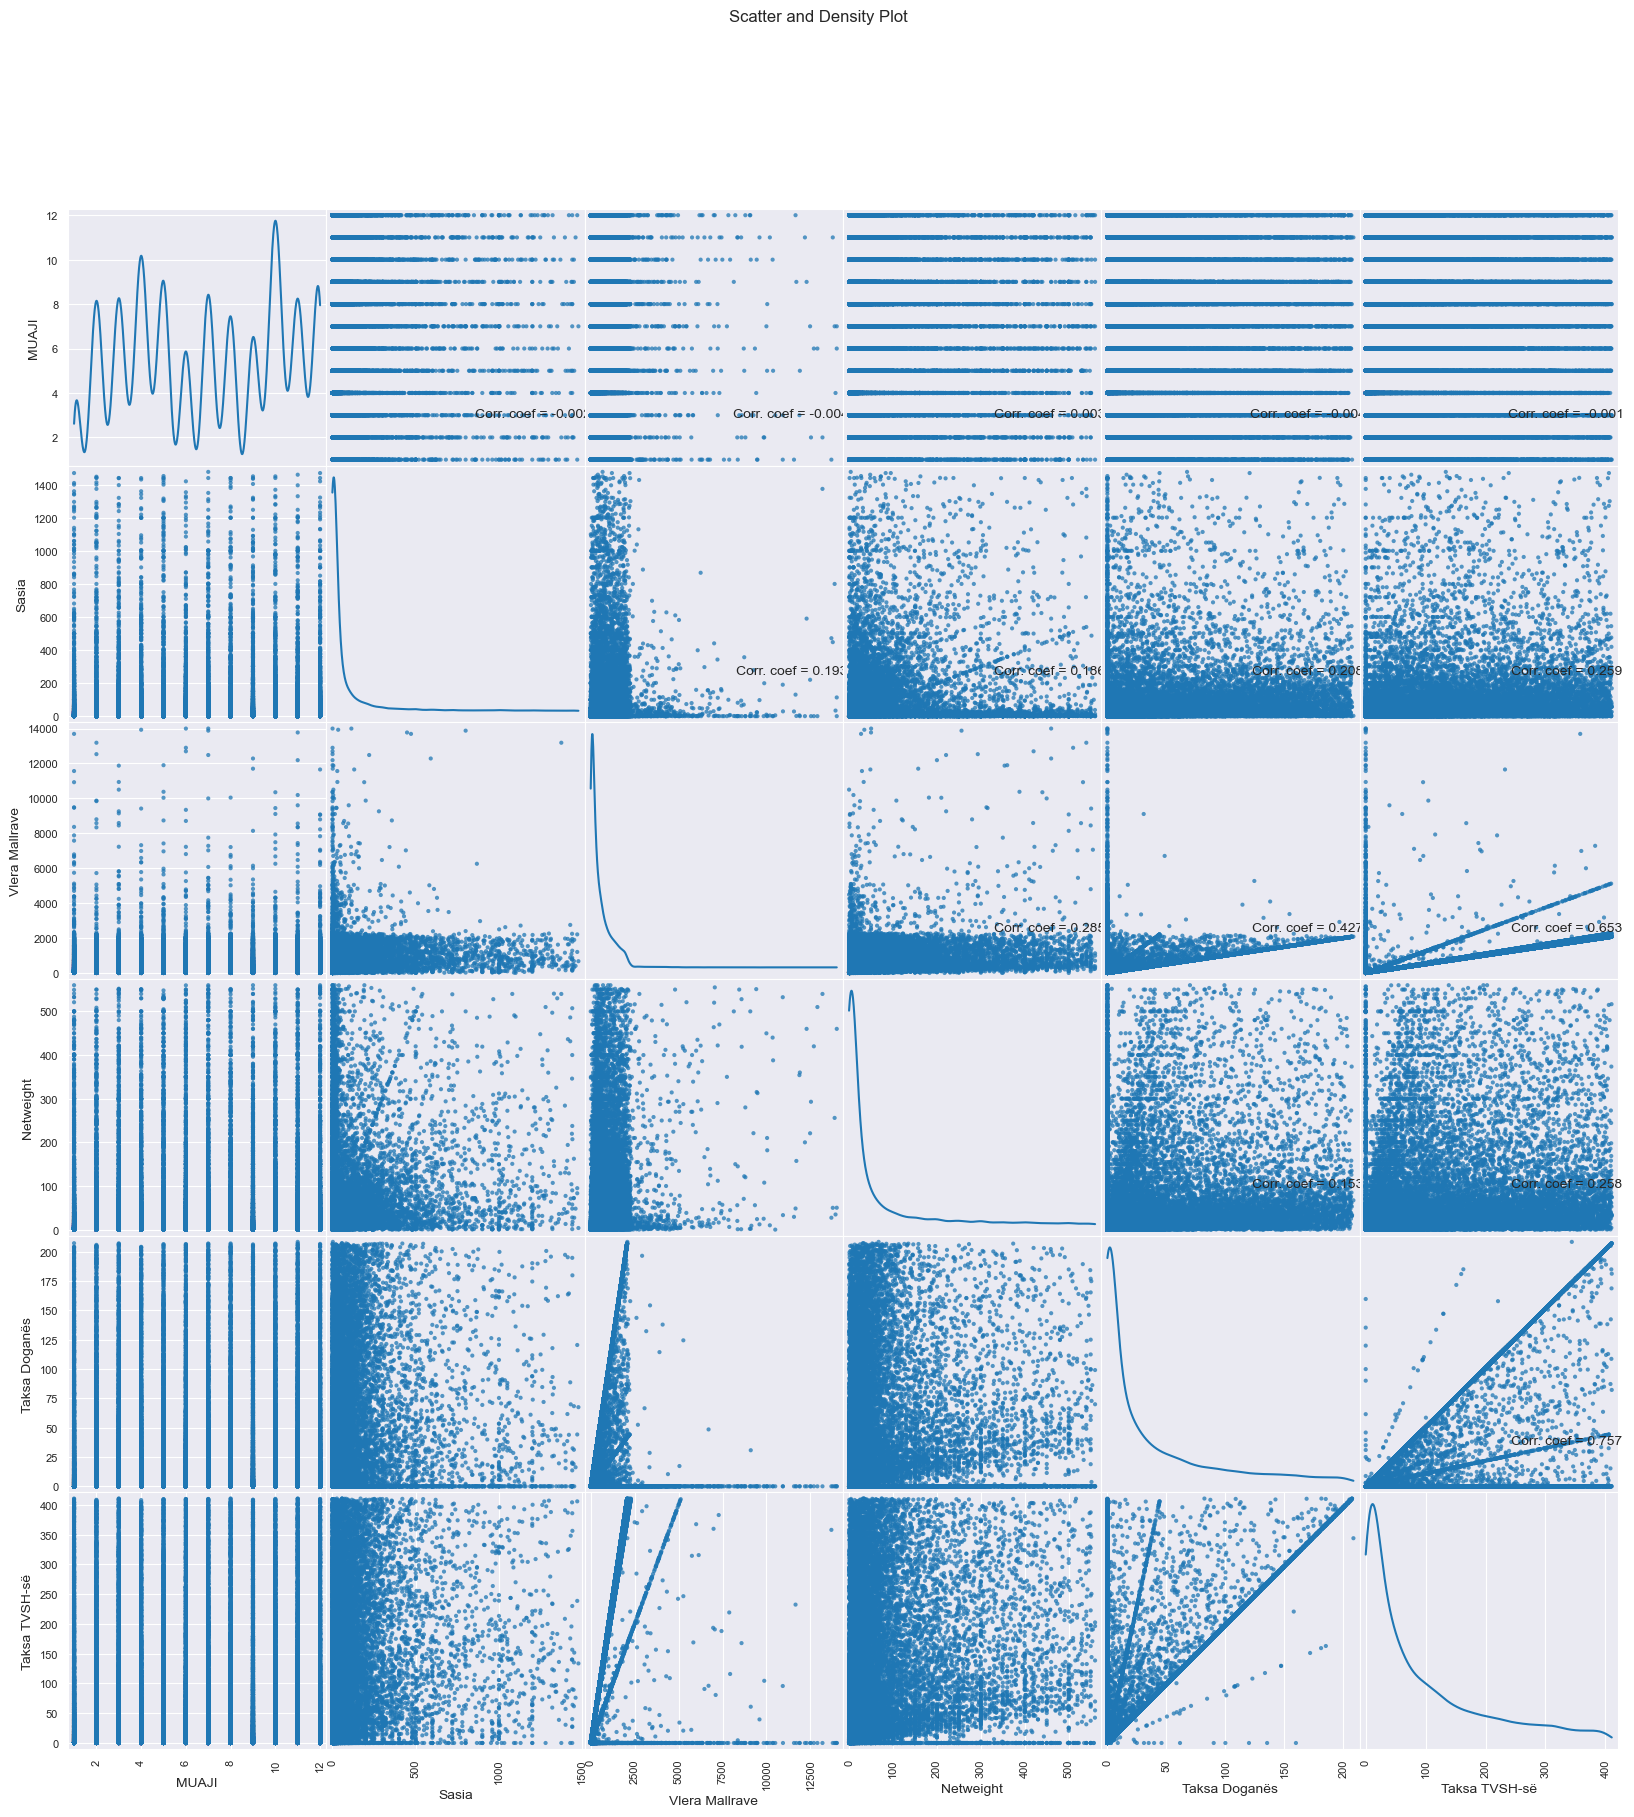

In [33]:
plotScatterMatrix(df_cleaned, 20, 10)

To do:
# me i transformu keto shtet ne shkurtesa 
# me i trasformu produktet vetem me kode